In [18]:
# Plot the polarization variation with time

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from obspy import read, UTCDateTime
from utils_cc import read_template_and_match
from utils_preproc import read_and_process_template_waveforms
from utils_pol import get_pol_vidale, plot_waveforms_and_pols
from numpy import array, amax, abs, real
from numpy.linalg import norm
from numpy.random import normal
from os.path import join

In [19]:
## Inputs
root = "/Volumes/OmanData/geophones_no_prefilt/data"
timewin = "2020-01-12-17-00-00"
tempname = "SiblingA12-17-23-35"
phase = "X"
station = "A04"

freqmin = 10.0
freqmax = None
dur = 0.1
mincc = 0.7
numdet_min = 4

freqmin = 10
freqmax = None

begin = -0.05
end = 0.15

winlen = 7

In [20]:
## Read the template and match file
if freqmax is None:
    suffix = f"highpass{freqmin:.0f}Hz_dur{dur:.2f}s_minCC{mincc:.1f}_minDet{numdet_min:d}"

else:
    suffix = f"bandpass{freqmin:.0f}-{freqmax:.0f}Hz_dur{dur:.2f}s_minCC{mincc:.1f}_mindet{numdet_min:d}"

filename = f"ccmatches_{tempname}_{suffix}.dat"

inpath = join(root, timewin, filename)
tempmatch = read_template_and_match(inpath)
template = tempmatch.template

In [21]:
## Read and process the waveform
tempwaveforms = read_and_process_template_waveforms(template, freqmin, freqmax, stations=station, begin=begin, end=end, reference="individual")
stream = tempwaveforms.waveforms

['Z', '1', '2']
A04
/Volumes/OmanData/geophones_no_prefilt/data
2020-01-12-17-00-00
Z
1
2


In [22]:
## Get the polarizations
trace_z = stream.select(station=station, channel="*Z")[0]
trace_1 = stream.select(station=station, channel="*1")[0]
trace_2 = stream.select(station=station, channel="*2")[0]

data_e = trace_2.data
data_n = trace_1.data
data_z = trace_z.data

pol_params = get_pol_vidale(data_e, data_n, data_z, winlen=winlen)

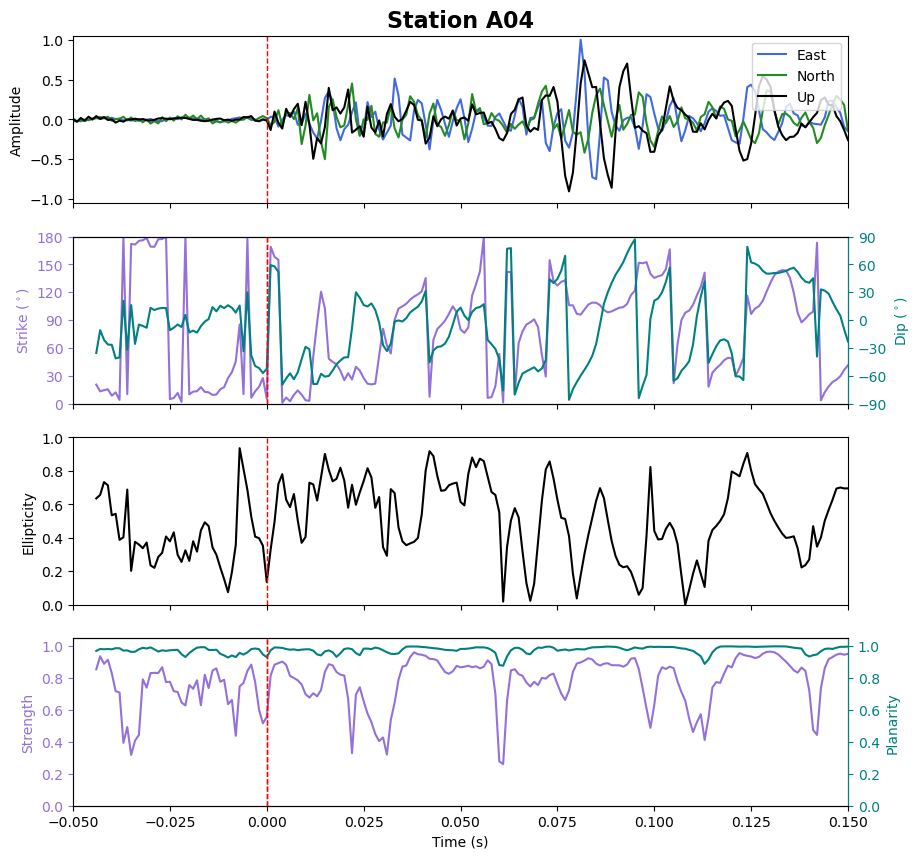

In [23]:
## Plot the polarizations
timeax = trace_z.times()+begin
fig, axdict, timeax_pol = plot_waveforms_and_pols(data_e, data_n, data_z, pol_params, timeax, winlen=winlen, station=station)

for ax in axdict.values():
    ax.axvline(0, color="r", linestyle="--", linewidth=1)


In [24]:
## Save the figure
fig.tight_layout()

filename = f"polarizations_{tempname}_{station}_{suffix}.png"
outpath = join(root, timewin, filename)
fig.savefig(outpath, dpi=300, transparent=True)